In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import classification_report , mean_squared_error , r2_score , accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
X = df.drop(['Serial No.','Chance of Admit '] , axis = 1)
y = df['Chance of Admit ']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [ ]:
X_train , y_train , X_test , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 34)


In [ ]:
R_model = LinearRegression()
R_model.fit(X_train , X_test)

LinearRegression()

In [ ]:
y_pred = R_model.predict(y_train)

In [ ]:
print(" The R2 score is : " ,  r2_score(y_test , y_pred))
print(" The Mean Squared Error is : " , mean_squared_error(y_test , y_pred))

 The R2 score is :  0.8060943640079619
 The Mean Squared Error is :  0.0039569528123787655


In [ ]:
print("The coeffecient or b is : " , R_model.coef_)
print("The intercept or a is : " , R_model.intercept_)

The coeffecient or b is :  [ 0.00200924  0.00268773  0.00830636 -0.00087031  0.02117261  0.11427509
  0.02046227]
The intercept or a is :  -1.289318252832559


In [ ]:
X = X.drop(['Research'] , axis = 1)
y = df['Research']
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [ ]:
X_train , y_train , X_test , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 34)

In [ ]:
C_model = LogisticRegression()
C_model.fit(X_train , X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = C_model.predict(y_train)
print(classification_report(y_test , y_pred))
print("The accuracy score is : " , accuracy_score(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61        45
           1       0.68      0.82      0.74        55

    accuracy                           0.69       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.69      0.68       100

The accuracy score is :  0.69


<Axes: >

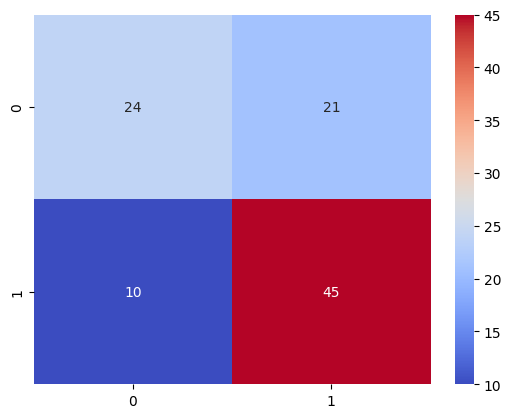

In [ ]:
matrix = confusion_matrix(y_test , y_pred)

sns.heatmap(matrix , annot = True , cmap= "coolwarm")